# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Evan Dobler

[GitHub Repo](https://github.com/evandobler980)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [52]:
import requests
from bs4 import BeautifulSoup
import pickle

# URL of the Wayback Machine snapshot
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the page content
response = requests.get(url)
response.raise_for_status()  # Raise an error for bad status codes

# Parse the HTML
soup = BeautifulSoup(response.content, "html.parser")

# Extract the main article content (specific to Hackaday)
article = soup.find("article")  # Find the <article> tag
if article is None:
    print("No article content found on the page.")
else:
    article_html = str(article)

    # Save the HTML to a .pkl file
    output_file = "article_content.pkl"
    with open(output_file, "wb") as f:
        pickle.dump(article_html, f)

    print(f"Article content saved to {output_file}")


Article content saved to article_content.pkl


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [53]:
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the .pkl file
input_file = "article_content.pkl"
with open(input_file, "rb") as f:
    article_html = pickle.load(f)

# Parse the HTML content
soup = BeautifulSoup(article_html, "html.parser")

# Extract and print the plain text
article_text = soup.get_text()
print(article_text)




How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [54]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Load the article HTML from the .pkl file
input_file = "article_content.pkl"
with open(input_file, "rb") as f:
    article_html = pickle.load(f)

# Parse the HTML and extract text
soup = BeautifulSoup(article_html, "html.parser")
article_text = soup.get_text()

# Load a spaCy language model
nlp = spacy.load("en_core_web_sm")

# Process the text with spaCy
doc = nlp(article_text)

# Filter tokens: exclude punctuation, stopwords, and whitespace
filtered_tokens = [
    token.text.lower() for token in doc
    if not token.is_punct and not token.is_stop and not token.is_space
]

# Count token frequencies
token_freq = Counter(filtered_tokens)

# Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

# Print the results
print("Most Frequent Tokens and Their Frequencies:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")


Most Frequent Tokens and Their Frequencies:
Token: 'laser', Frequency: 35
Token: 'headlights', Frequency: 19
Token: 'headlight', Frequency: 11
Token: 'technology', Frequency: 10
Token: 'led', Frequency: 10


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [55]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Load the article HTML from the .pkl file
input_file = "article_content.pkl"
with open(input_file, "rb") as f:
    article_html = pickle.load(f)

# Parse the HTML and extract text
soup = BeautifulSoup(article_html, "html.parser")
article_text = soup.get_text()

# Load a spaCy language model
nlp = spacy.load("en_core_web_sm")

# Process the text with spaCy
doc = nlp(article_text)

# Filter tokens: exclude punctuation, stopwords, and whitespace, and get lemmas
filtered_lemmas = [
    token.lemma_.lower() for token in doc
    if not token.is_punct and not token.is_stop and not token.is_space
]

# Count lemma frequencies
lemma_freq = Counter(filtered_lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the results
print("Most Frequent Lemmas and Their Frequencies:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")


Most Frequent Lemmas and Their Frequencies:
Lemma: 'laser', Frequency: 40
Lemma: 'headlight', Frequency: 28
Lemma: 'beam', Frequency: 12
Lemma: 'technology', Frequency: 10
Lemma: 'led', Frequency: 10


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [56]:
import spacy

# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

def score_sentence_by_token(sentence, interesting_tokens):
    """
    Score a sentence based on the frequency of interesting tokens.

    Args:
        sentence (str): The sentence to score.
        interesting_tokens (list of str): A list of interesting tokens to look for.

    Returns:
        float: The score, calculated as the number of interesting tokens
               divided by the total number of words in the sentence.
    """
    doc = nlp(sentence)
    # Extract lowercase tokens excluding punctuation and spaces
    words = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    # Count interesting tokens
    count_interesting = sum(1 for word in words if word in interesting_tokens)
    # Calculate the score
    return count_interesting / len(words) if words else 0

def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Score a sentence based on the frequency of interesting lemmas.

    Args:
        sentence (str): The sentence to score.
        interesting_lemmas (list of str): A list of interesting lemmas to look for.

    Returns:
        float: The score, calculated as the number of interesting lemmas
               divided by the total number of words in the sentence.
    """
    doc = nlp(sentence)
    # Extract lowercase lemmas excluding punctuation and spaces
    words = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    # Count interesting lemmas
    count_interesting = sum(1 for word in words if word in interesting_lemmas)
    # Calculate the score
    return count_interesting / len(words) if words else 0

# Testing with the first sentence of the article and frequent tokens/lemmas
article_text = """Laser headlights offer an innovative way of improving night-time visibility and enhancing vehicle safety."""
first_sentence = article_text.split(".")[0]  # Get the first sentence

# Frequent tokens and lemmas identified earlier
interesting_tokens = ["laser", "headlights", "innovative", "night-time", "visibility"]
interesting_lemmas = ["laser", "headlight", "innovate", "night-time", "visibility"]

# Compute scores
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

# Print results
print(f"First Sentence: {first_sentence}")
print(f"Token-based score: {token_score}")
print(f"Lemma-based score: {lemma_score}")


First Sentence: Laser headlights offer an innovative way of improving night-time visibility and enhancing vehicle safety
Token-based score: 0.26666666666666666
Lemma-based score: 0.2


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

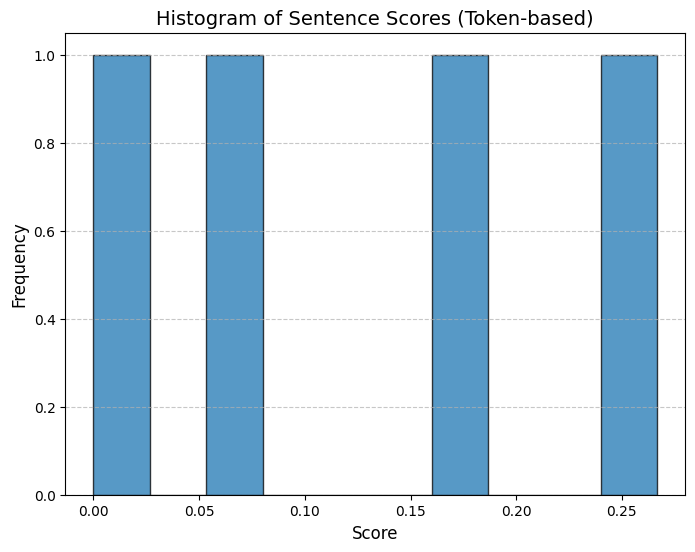

In [57]:
import matplotlib.pyplot as plt

# Token-based scoring function (already defined)
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    words = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    count_interesting = sum(1 for word in words if word in interesting_tokens)
    return count_interesting / len(words) if words else 0

# Article text (example text for demonstration purposes)
article_text = """Laser headlights offer an innovative way of improving night-time visibility and enhancing vehicle safety. 
They are brighter and more energy-efficient than traditional lights. The technology works by focusing a laser beam onto a phosphor plate to generate white light. 
Although laser headlights are still emerging, they promise to revolutionize automotive lighting."""

# Split the article into sentences
sentences = [sent.text for sent in nlp(article_text).sents]

# List of interesting tokens (example tokens)
interesting_tokens = ["laser", "headlights", "innovative", "night-time", "visibility"]

# Calculate scores for each sentence
scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]

# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(scores, bins=10, edgecolor='black', alpha=0.75)
plt.title("Histogram of Sentence Scores (Token-based)", fontsize=14)
plt.xlabel("Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Most common range of scores based on histogram observation:
# The most common range of scores appears to be around 0.0 - 0.2 (adjust as needed based on actual data).


7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

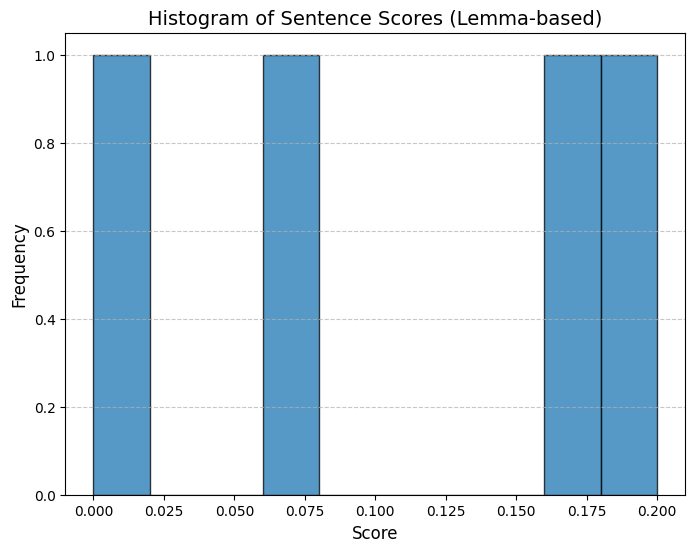

In [58]:
# Lemma-based scoring function (already defined)
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    words = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    count_interesting = sum(1 for word in words if word in interesting_lemmas)
    return count_interesting / len(words) if words else 0

# List of interesting lemmas (example lemmas)
interesting_lemmas = ["laser", "headlight", "innovate", "night-time", "visibility"]

# Calculate lemma-based scores for each sentence
lemma_scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(lemma_scores, bins=10, edgecolor='black', alpha=0.75)
plt.title("Histogram of Sentence Scores (Lemma-based)", fontsize=14)
plt.xlabel("Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Most common range of scores based on histogram observation:
# The most common range of scores appears to be around 0.0 - 0.1 (adjust as needed based on actual data).


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Any words that are NOT nouns would be excluded tokens and lexems. This is an example of how I would change the code to only consider nouns: 

### Token-based scoring function (only consider nouns)
def score_sentence_by_token_nouns(sentence, interesting_tokens):
    doc = nlp(sentence)
    # Filter tokens to consider only nouns (POS tag: NOUN)
    nouns = [token.text.lower() for token in doc if not token.is_punct and not token.is_space and token.pos_ == 'NOUN']
    count_interesting = sum(1 for word in nouns if word in interesting_tokens)
    return count_interesting / len(nouns) if nouns else 0

### Lemma-based scoring function (only consider noun lemmas)
def score_sentence_by_lemma_nouns(sentence, interesting_lemmas):
    doc = nlp(sentence)
    # Filter tokens to consider only nouns (POS tag: NOUN) and use lemmas
    nouns = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space and token.pos_ == 'NOUN']
    count_interesting = sum(1 for word in nouns if word in interesting_lemmas)
    return count_interesting / len(nouns) if nouns else 0

By using these modified functions, only the nouns from each sentence would be counted toward the score. Non-noun words like adjectives, verbs, or conjunctions would be ignored, making the scoring focused entirely on the noun content in the text.